# Machine Learning Assignment 2

## Lung Cancer classifier using Random Forest Classifier algorithm

IT18160512 - Ganegoda R.D 

IT19234694 - S.D. Thewahettige 

IT19214962 - Alagiyawanna A.M.A.R.P

IT19233840 - Pethiyagoda R.M.S.U.B

# 1. Importing Data

In [2]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as sm
%matplotlib inline

In [3]:
# load the dataset from csv file
lung_cancer = pd.read_csv("LungCancerData.csv")

In [4]:
#Display first 5 rows of the dataset
lung_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# 2. EXPLORING THE DATA

In [5]:
# Key values in the dataset
lung_cancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
#get the counts of Benign and Malignant values in the diagnosis column 
lung_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Get the shape according to the columns and rows counts
lung_cancer.shape

(569, 32)

In [8]:
# Display the data types 
lung_cancer.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [9]:
# Descriptive statistics for each column
lung_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 3.DATA PREPROCESSING

In [10]:
# Count the empty values in each column
lung_cancer.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [11]:
# Checking if any duplicates in "id" column by finding unique values and if their frequency is greater than 1
lung_cancer.id.value_counts().unique()

array([1], dtype=int64)

In [12]:
# Since "id" column has no direct impact on target value so it will drop from dataset
lung_cancer.drop('id',axis=1,inplace=True)

In [13]:
lung_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [14]:
lung_cancer.duplicated().sum()

0

In [15]:
# Checking if any duplicate values in the df
lung_cancer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [16]:
# To check presence of missing (NaN) values
lung_cancer.isnull().any()

diagnosis            False
radius_mean          False
texture_mean         False
perimeter_mean       False
area_mean            False
smoothness_mean      False
compactness_mean     False
concavity_mean       False
points_mean          False
symmetry_mean        False
dimension_mean       False
radius_se            False
texture_se           False
perimeter_se         False
area_se              False
smoothness_se        False
compactness_se       False
concavity_se         False
points_se            False
symmetry_se          False
dimension_se         False
radius_worst         False
texture_worst        False
perimeter_worst      False
area_worst           False
smoothness_worst     False
compactness_worst    False
concavity_worst      False
points_worst         False
symmetry_worst       False
dimension_worst      False
dtype: bool

In [17]:
lung_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [18]:
lung_cancer.shape

(569, 31)

In [19]:
# Mapping string values of the diagnosis column feature to numerical value feature using map function
cancer_mapping = {'B':0, 'M':1}
lung_cancer.diagnosis = lung_cancer.diagnosis.map(cancer_mapping)

In [20]:
# afer maping show first 20 raws of the data frame
lung_cancer.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
5,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
6,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,...,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
7,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
8,0,10.49,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,...,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552
9,0,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,...,11.92,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080


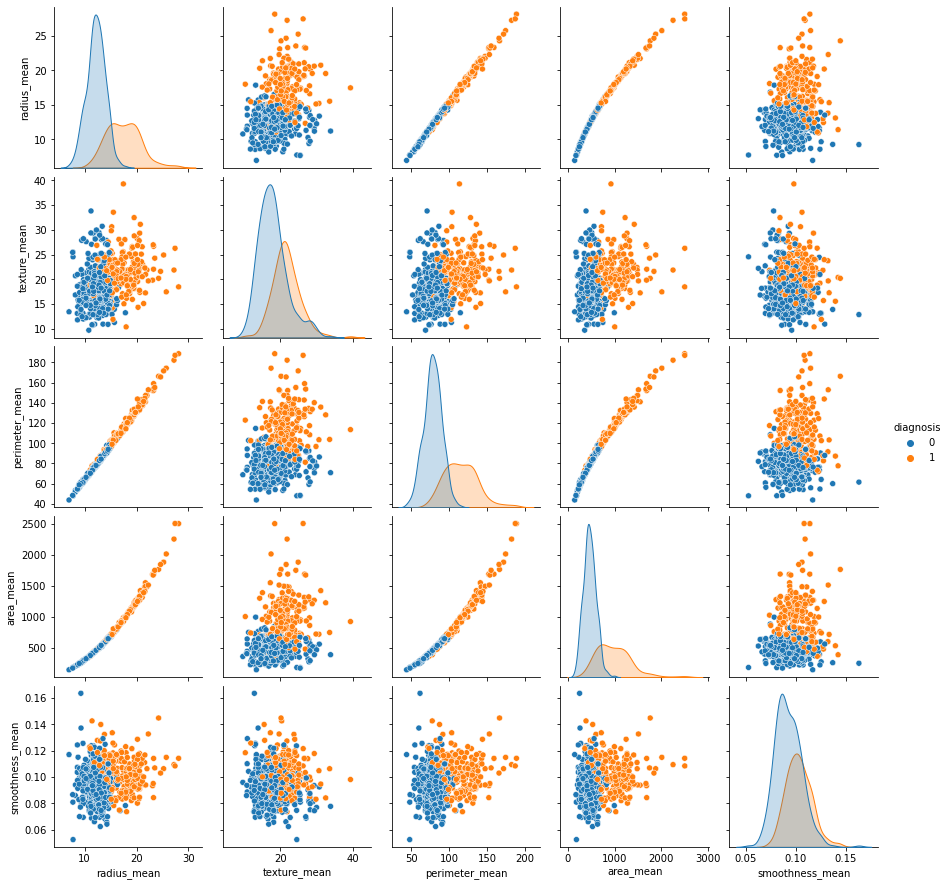

In [21]:
# Visualising selected features by target:
sb.pairplot(lung_cancer, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'] )

# 4.VISUALIZING THE DATA

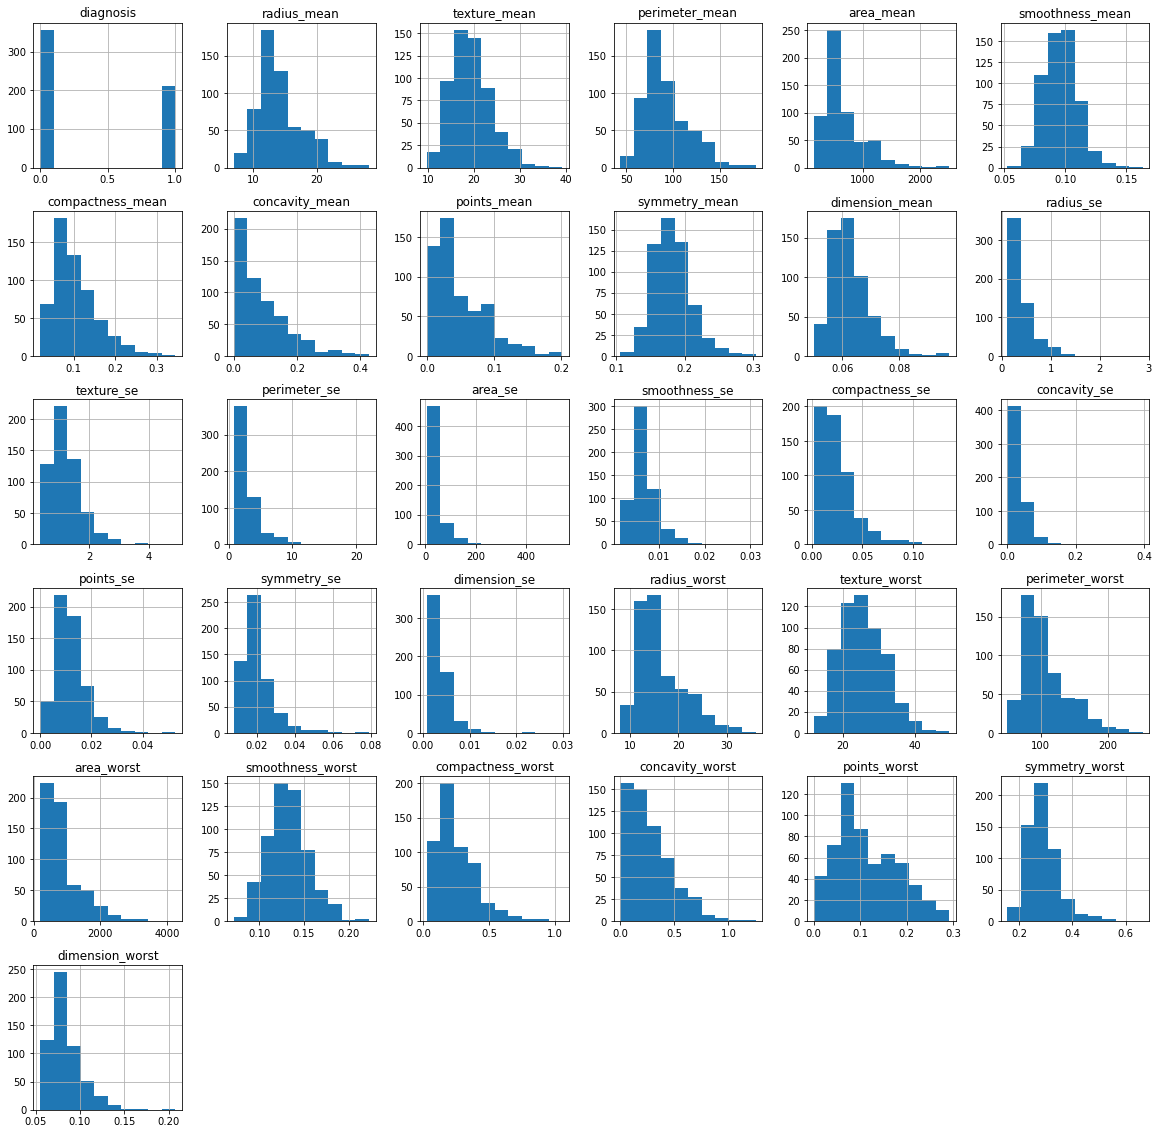

In [22]:
# Getting insight of data distribution based on frequency of unique values in the features
lung_cancer.hist(figsize=(20,20))
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

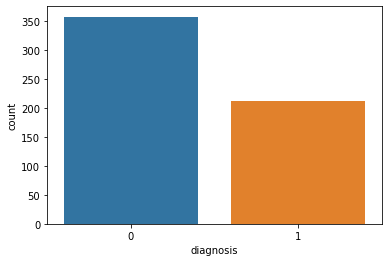

In [23]:
# 357 benign (1), 212 malignant (0)
sb.countplot(lung_cancer['diagnosis'], label = "Count") 

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

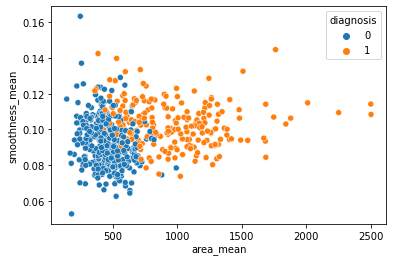

In [24]:
sb.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = lung_cancer)

<AxesSubplot:>

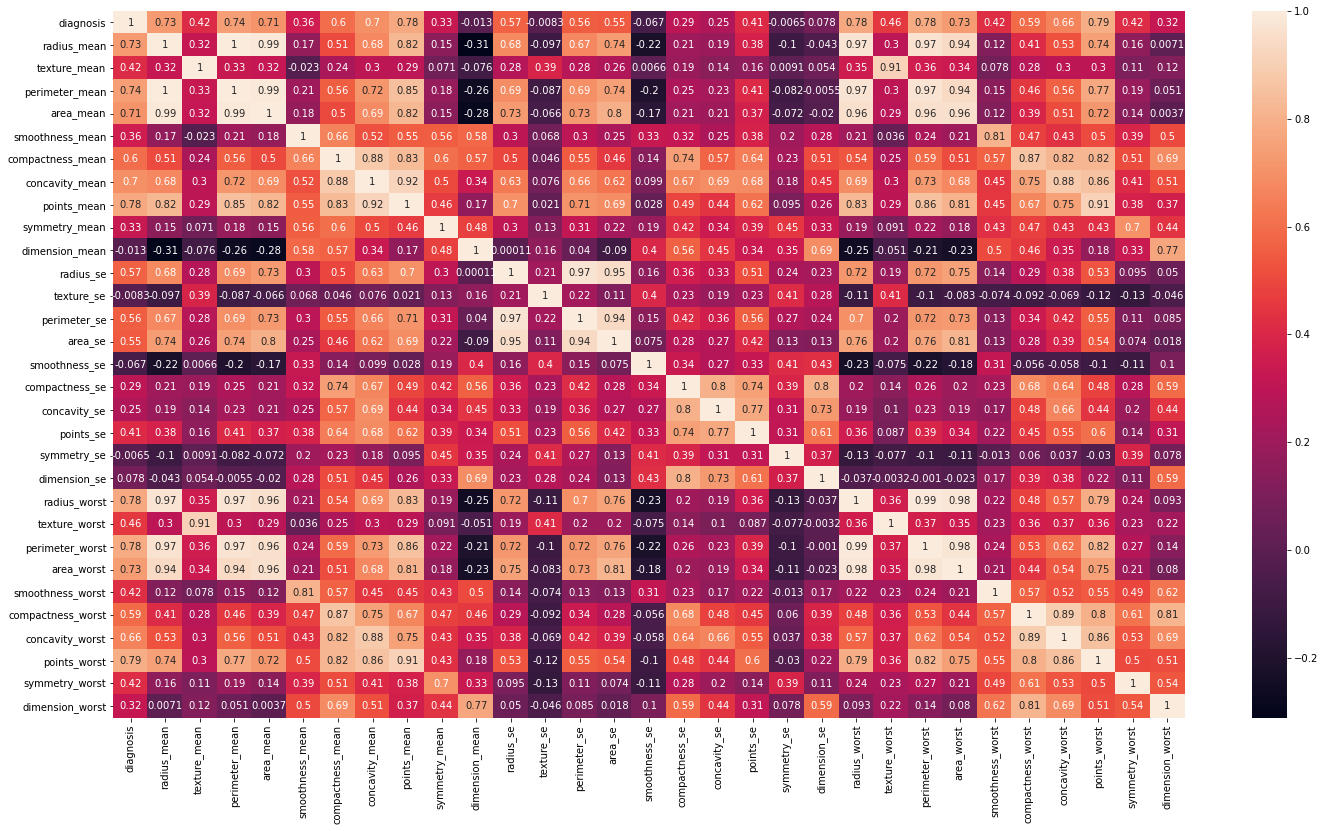

In [25]:
# Visualize the correlation 
plt.figure(figsize=(24,13)) 
sb.heatmap(lung_cancer.corr(), annot=True) 

# 5.MODEL TRAINING

In [26]:
# drop the target label coloumns
X = lung_cancer.drop(['diagnosis'],axis=1)

In [27]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [28]:
# Define output values - this is the target
Y = lung_cancer['diagnosis']
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [29]:
lung_cancer_list=list(X.columns)

In [30]:
lung_cancer_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

In [31]:
# splitting the data into test and train / using 20% of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

In [32]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
306,15.220,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090
410,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.77270,0.15610,0.2639,0.11780
197,14.620,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,...,16.11,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246
376,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
244,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,...,25.28,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,...,11.54,23.31,74.22,402.8,0.12190,0.14860,0.07987,0.03203,0.2826,0.07552
73,17.850,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,0.1220,0.05243,...,19.82,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871
400,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,...,11.24,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209
118,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255


In [33]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
28,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,0.2036,0.07125,...,10.750,23.07,71.25,353.6,0.12330,0.34160,0.43410,0.08120,0.2982,0.09825
163,9.000,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
123,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,0.1717,0.05054,...,30.750,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494
361,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847,0.05338,...,16.840,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287
549,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,11.740,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.027630,0.2101,0.06113,...,13.310,18.26,84.70,533.7,0.10360,0.08500,0.06735,0.08290,0.3101,0.06688
515,12.830,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.068610,0.2123,0.07254,...,15.200,30.15,105.30,706.0,0.17770,0.53430,0.62820,0.19770,0.3407,0.12430
186,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,0.2131,0.06325,...,19.590,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061
3,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,...,11.920,15.77,76.53,434.0,0.13670,0.18220,0.08669,0.08611,0.2102,0.06784


In [34]:
Y_train

306    1
410    0
197    0
376    0
244    1
      ..
8      0
73     0
400    0
118    1
206    0
Name: diagnosis, Length: 455, dtype: int64

In [35]:
Y_test

28     0
163    0
123    1
361    1
549    0
      ..
414    0
515    1
186    1
3      0
261    0
Name: diagnosis, Length: 114, dtype: int64

In [36]:
print(X_train.shape,' The shape of Training Features')
print(Y_train.shape,' The shape of Training Lables')
print(X_test.shape,'  The shape of Testing Features')
print(Y_test.shape,'  The shape of Testing Lables')

(455, 30)  The shape of Training Features
(455,)  The shape of Training Lables
(114, 30)   The shape of Testing Features
(114,)   The shape of Testing Lables
